In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, excel file I/O (e.g. pd.read_excel)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_excel('elektro2018-2019.xlsx', header=None)

In [3]:
# Menghapus Index ke-0
df = df.drop([0])

# Menghapus Index
df = df.reset_index(drop=True)
df.columns = ['Nim','Nama','Prodi','Lama Penulisan','SKS','IPK','TOEFL','Kelas']

In [4]:
df.head()

,Nim,Nama,Prodi,Lama Penulisan,SKS,IPK,TOEFL,Kelas
0,1700022067,Nasruloh,Teknik Elektro,5.9,146,3.47,465,Tepat Waktu
1,1700022090,Wahid Riyanto,Teknik Elektro,5.133333,146,3.53,473,Tepat Waktu
2,1700022002,Fajar Setiawan,Teknik Elektro,5.733333,146,3.68,472,Tepat Waktu
3,1700022003,Ahmad Riyatno,Teknik Elektro,5.833333,146,3.56,433,Tepat Waktu
4,1700022026,Cisi Fitri Wulandari,Teknik Elektro,6.066667,144,3.86,410,Tepat Waktu


In [5]:
df.shape

(147, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nim             147 non-null    object
 1   Nama            147 non-null    object
 2   Prodi           147 non-null    object
 3   Lama Penulisan  147 non-null    object
 4   SKS             147 non-null    object
 5   IPK             147 non-null    object
 6   TOEFL           147 non-null    object
 7   Kelas           147 non-null    object
dtypes: object(8)
memory usage: 9.3+ KB


In [7]:
df.isnull().values.any()

False

In [8]:
ket = {"Tepat Waktu" : 0, "Tidak Tepat Waktu" : 1}
df["Kelas"] = df["Kelas"].map(ket)

In [9]:
df['Kelas'].value_counts()

Kelas
0    76
1    71
Name: count, dtype: int64

In [10]:
print('Tepat Waktu', round(df['Kelas'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Tidak Tepat Waktu', round(df['Kelas'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Tepat Waktu 51.7 % of the dataset
Tidak Tepat Waktu 48.3 % of the dataset


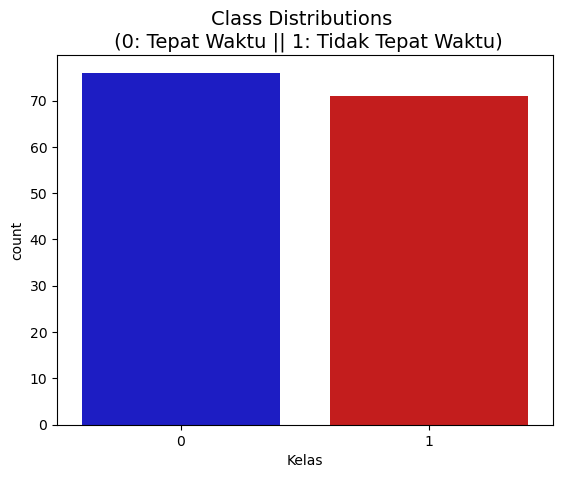

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Kelas', data=df, palette=colors)
plt.title('Class Distributions \n (0: Tepat Waktu || 1: Tidak Tepat Waktu)', fontsize=14)
plt.show()

# Dataset tidak balance, jomplang bet perbedaannya.


kita Resampling datanya. Resampling ada 2 :

Random Oversampling: Randomly duplicate examples in the minority class.
Random Undersampling: Randomly delete examples in the majority class.
disini kita menggunakan random over sampling

In [12]:
# Class count
count_class_0, count_class_1 = df.Kelas.value_counts()

# Divide by class
df_class_0 = df[df['Kelas'] == 0]
df_class_1 = df[df['Kelas'] == 1]

Random over-sampling:
Kelas
0    76
1    76
Name: count, dtype: int64


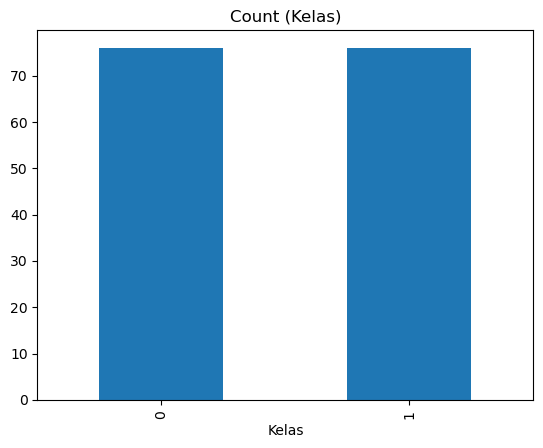

In [13]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Kelas.value_counts())

df_test_over.Kelas.value_counts().plot(kind='bar', title='Count (Kelas)');

gas kan le, kalo udah balance

In [14]:
x = df[['Lama Penulisan', 'SKS', 'IPK', 'TOEFL']]
y = df['Kelas']

In [15]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

validation_size = 0.20
num_trees = 5

# Pisahkan data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, shuffle=False, random_state=42)

In [16]:
# Inisialisasi model Random Forest dengan parameter yang disetel secara manual
model = RandomForestClassifier(
    n_estimators=num_trees,
    max_depth=10,
    min_samples_split=3,
    min_samples_leaf=2
)

In [17]:
model = RandomForestClassifier(n_estimators=num_trees, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [18]:
# Prediksi pada data latih
y_train_pred = model.predict(x_train)

# Prediksi pada data uji
y_test_pred = model.predict(x_test)

In [19]:
# Hitung confusion matrix pada data latih
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

In [20]:
# Hitung akurasi pada data latih
accuracy_train = accuracy_score(y_train, y_train_pred)

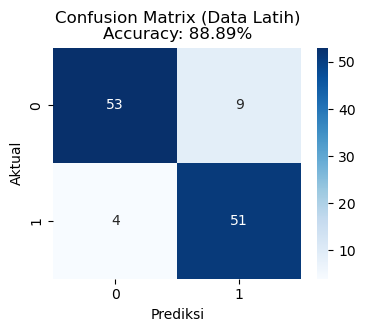

In [21]:
# Visualisasi confusion matrix pada data uji
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title(f'Confusion Matrix (Data Latih)\nAccuracy: {accuracy_train:.2%}')
plt.show()

In [22]:
# Hitung confusion matrix pada data uji
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

In [23]:
# Hitung akurasi pada data uji
accuracy_test = accuracy_score(y_test, y_test_pred)

In [24]:
# Ekstraksi nilai dari confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
tn, fp, fn, tp = conf_matrix_test.ravel()

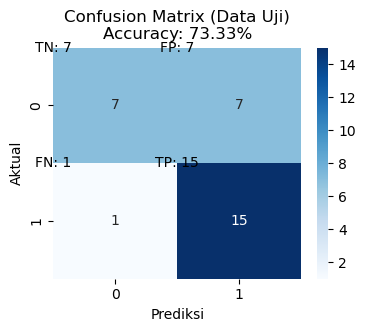

In [25]:
# Visualisasi confusion matrix pada data uji dengan penekanan pada True Positive dan False Negative
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])

# Menambahkan label untuk True Positive dan False Negative
plt.text(0, 0, f'TN: {tn}', horizontalalignment='center', verticalalignment='center')
plt.text(0, 1, f'FN: {fn}', horizontalalignment='center', verticalalignment='center')
plt.text(1, 0, f'FP: {fp}', horizontalalignment='center', verticalalignment='center')
plt.text(1, 1, f'TP: {tp}', horizontalalignment='center', verticalalignment='center')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title(f'Confusion Matrix (Data Uji)\nAccuracy: {accuracy_test:.2%}')
plt.show()

In [26]:
df_new = pd.read_excel('elektro20.xlsx')

In [27]:
# Menghapus Index
df_new = df_new.reset_index(drop=True)
df_new.columns = ['nim','nama','prodi','Lama Penulisan','SKS','IPK','TOEFL','Kelas']
def_status = 0
df_new.fillna(def_status, inplace=True)
df_new

,nim,nama,prodi,Lama Penulisan,SKS,IPK,TOEFL,Kelas
0,2000022001,Fahriza Dwipa Putra,Teknik Elektro,6,127,3.03,495,0.0
1,2000022002,Dwi Ilham Juari Romdlon,Teknik Elektro,6,126,3.91,480,0.0
2,2000022003,Muh. Janwar Bakir,Teknik Elektro,5,128,3.53,484,0.0
3,2000022004,Kelvin Purba,Teknik Elektro,5,128,3.83,523,0.0
4,2000022005,Linggar Rahmat Dwiyono,Teknik Elektro,8,128,3.80,480,0.0
5,2000022007,Oxi Hornavan Valiant As Shidiq,Teknik Elektro,6,130,3.78,430,0.0
6,2000022009,Mushariful Rakim,Teknik Elektro,6,128,3.10,401,0.0
7,2000022011,Rully Rahmanda,Teknik Elektro,5,127,3.35,417,0.0
8,2000022012,Sigit Suryo Saputro,Teknik Elektro,5,126,4.00,461,0.0
9,2000022015,Gusti Rizal Adypratama,Teknik Elektro,8,126,3.10,455,0.0


In [28]:
# Mapping kelas menjadi 0 (Tepat Waktu) dan 1 (Tidak Tepat Waktu)
ket = {"Tepat Waktu": 0, "Tidak Tepat Waktu": 1}
df_new["Kelas"] = df_new["Kelas"].map(ket)

In [29]:
# Membuat data training
data2 = df_new.loc[:, ['Lama Penulisan', 'SKS', 'IPK', 'TOEFL']]
X_new = data2

In [30]:
# Prediksi menggunakan model Random Forest yang telah dilatih
predictions_new = model.predict(X_new)

In [31]:
# Mapping hasil prediksi menjadi label yang sesuai
hasil_prediksi = pd.Series(predictions_new).map({0: "Tepat Waktu", 1: "Tidak Tepat Waktu"})

In [32]:
# Menambahkan kolom Hasil ke dataset_new
df_new['Hasil'] = hasil_prediksi

In [33]:
# Menampilkan hasil prediksi
print("Prediksi untuk dataset baru:")
print(df_new[['nim','nama','prodi','Lama Penulisan','SKS','IPK','TOEFL','Hasil']])

Prediksi untuk dataset baru:
           nim                             nama           prodi  \
0   2000022001              Fahriza Dwipa Putra  Teknik Elektro   
1   2000022002          Dwi Ilham Juari Romdlon  Teknik Elektro   
2   2000022003                Muh. Janwar Bakir  Teknik Elektro   
3   2000022004                     Kelvin Purba  Teknik Elektro   
4   2000022005           Linggar Rahmat Dwiyono  Teknik Elektro   
5   2000022007   Oxi Hornavan Valiant As Shidiq  Teknik Elektro   
6   2000022009                 Mushariful Rakim  Teknik Elektro   
7   2000022011                   Rully Rahmanda  Teknik Elektro   
8   2000022012              Sigit Suryo Saputro  Teknik Elektro   
9   2000022015           Gusti Rizal Adypratama  Teknik Elektro   
10  2000022016                Toko Megi Yohanto  Teknik Elektro   
11  2000022018                        Julkiflin  Teknik Elektro   
12  2000022019          Muhammad Damar Wibisono  Teknik Elektro   
13  2000022022  Muhammad Farhan R

In [34]:
# Hitung nilai kelas
class_counts = df_new.Hasil.value_counts()

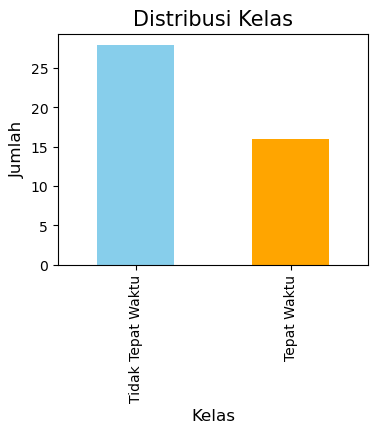

In [35]:
# Buat plot bar
plt.figure(figsize=(4,3))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
# Beri judul dan label sumbu
plt.title('Distribusi Kelas', fontsize=15)
plt.xlabel('Kelas', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tampilkan plot
plt.show()

In [36]:
# Simpan model ke dalam file menggunakan pickle
import pickle
with open('elektro.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)